In [37]:
#from read_roi import read_roi_file
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

from skimage import io
from scipy import ndimage

roi_dir = "/home/lpe/Desktop/Intron-ROIs/"
roi_dir_csv = "/home/lpe/Desktop/Intron-ROIs/oi_to_csv/"
exon_dir = "/home/lpe/preibisch/csv-before/"

def closest_node(node, nodes, selectah):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return (selectah[np.argmin(dist_2,)], min(dist_2))

In [38]:
ex_im = "/home/lpe/Downloads/C0-N2_352_cropped_1240.tif"
int_im = "/home/lpe/Documents/C1-N2_352_cropped_1240.tif"
dap_im = "/home/lpe/Desktop/C4-N2_352_cropped_1240.tif"

In [39]:
# this cell is required to run these notebooks on Binder
# if running on Binder, remember to **WAIT 5 SECONDS** after
# running the '%gui qt' cell below. If you get an error,
# click on "Kernel -> Restart" and try again. Make sure also
# that you have a desktop tab open.
import os
if 'BINDER_SERVICE_HOST' in os.environ:
    os.environ['DISPLAY'] = ':1.0'

In [40]:
#Dry run napari vis :D

%gui qt

import napari
from napari.utils import nbscreenshot

# Create an empty viewer
viewer = napari.Viewer()

viewer.open(ex_im,colormap = 'blue',gamma = 2, plugin='builtins');

In [41]:
from tifffile import imread

# load the image data and inspect its shape
intron = imread(int_im)
print(intron.shape)
viewer.add_image(intron, colormap='green',gamma = 2, blending='additive');

(51, 509, 433)


In [42]:
dapi = imread(dap_im)
print(dapi.shape)
viewer.add_image(dapi, colormap='red',gamma = 2, blending='additive');

(51, 509, 433)


In [43]:
dapi_detection = io.imread(dap_im, plugin='tifffile')
dapi_detection = ndimage.median_filter(dapi_detection, size=(1,3,3))

#intron_detection = io.imread(int_file, plugin='tifffile')
#intron_detection = ndimage.gaussian_filter(intron_detection,sigma = .45)

intron_detection = io.imread(int_im, plugin='tifffile')


#intron_detection_gauss = ndimage.gaussian_filter(intron_detection,sigma = 10)

intron_detection_gauss = ndimage.gaussian_filter(intron_detection,sigma = .5)
intron_detection_median = ndimage.median_filter(intron_detection, size=(1,3,3))
new_arr = intron_detection_gauss# - intron_detection_median


ex_detection_gauss = io.imread(ex_im, plugin='tifffile')
#ex_detection_gauss = ndimage.gaussian_filter(ex_detection,sigma = .5)


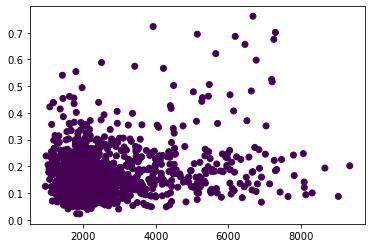

In [44]:



z_lim = intron_detection.shape[0]
embryo_ind = 1
dapi_mean_intensity = []
intron_mean_intensity = []
exon_spot_intensity = []
which_file = []
experiment_ID = []
ex_mean_int = []
x_Crd = []
y_Crd = []
z_Crd = []
#x y z t c intensity

region_of_interest = 4
exon_csv = "/home/lpe/Downloads/Results.csv"
#exon_csv = "/home/lpe/Dropbox/exon_csv_and_output/C0-N2_352_cropped_1240.csv"
with open(exon_csv) as csvfile:
        exon_csvitem= np.asarray(list(csv.reader(csvfile,delimiter=",")))
        #for each coordinate in exon csv

for entry in exon_csvitem:
    x_coord = entry[0].astype("float")
    y_coord = entry[1].astype("float")
    z_coord = entry[2].astype("float")
    
    x_coord = int(round(x_coord)) 
    y_coord = int(round(y_coord)) 
    z_coord = int(round(z_coord)) 

    x_min = x_coord - region_of_interest
    x_max = x_coord + region_of_interest

    y_min = y_coord - region_of_interest
    y_max = y_coord + region_of_interest
   # print(x_coord,y_coord,z_coord)
    depth = z_coord 
    if depth < z_lim:
        #select 3,3 window

        intron_segment = new_arr[depth ,y_min:y_max,x_min:x_max]# 
        dapi_segment = dapi_detection[depth,y_min:y_max,x_min:x_max]
        ex_sgement = ex_detection_gauss[depth ,y_min:y_max,x_min:x_max]
        #measure intensity

        mean_dapi = np.mean(dapi_segment)
        mean_intron = np.max(intron_segment)
        max_ex = np.max(ex_sgement)
        #print(np.argmax(intron_segment))
        
        ex_mean_int = np.append(ex_mean_int, max_ex)
        dapi_mean_intensity = np.append(dapi_mean_intensity,mean_dapi)
        intron_mean_intensity = np.append(intron_mean_intensity,mean_intron)
        exon_spot_intensity = np.append(exon_spot_intensity, entry[4].astype("float"))
        which_file = np.append(which_file, 1)
        
        experiment_ID = np.append(experiment_ID, embryo_ind)
        
        x_Crd = np.append(x_Crd, x_coord)
        y_Crd = np.append(y_Crd, y_coord)
        z_Crd = np.append(z_Crd, z_coord)
#with open(int_roi_csv) as csvfile:
#    int_csvitem= np.asarray(list(csv.reader(csvfile,delimiter="\t")))

# for entry in int_roi_csv:
#     print(entry)
#     x_coord = entry[0].astype("float") 
#     y_coord = entry[1].astype("float") 
#     z_coord = entry[2].astype("float") 

#     x_coord = int(round(x_coord))
#     y_coord = int(round(y_coord))
#     z_coord = int(round(z_coord))

#     x_min = x_coord - region_of_interest
#     x_max = x_coord + region_of_interest

#     y_min = y_coord - region_of_interest
#     y_max = y_coord + region_of_interest

#     depth = z_coord 
#     if depth < z_lim:
#         #select 3,3 window

#         intron_segment = new_arr[depth ,y_min:y_max,x_min:x_max]# 
#         dapi_segment =dapi_detection[depth,y_min:y_max,x_min:x_max]
#         ex_sgement = ex_detection_gauss[depth ,y_min:y_max,x_min:x_max]
#         #measure intensity

#         mean_dapi = np.mean(dapi_segment)
#         mean_intron = np.max(intron_segment)
#         max_ex = np.max(ex_sgement)
        
#         ex_mean_int = np.append(ex_mean_int, max_ex)
#         dapi_mean_intensity = np.append(dapi_mean_intensity,mean_dapi)
#         intron_mean_intensity = np.append(intron_mean_intensity,mean_intron)
#         exon_filler = .542
#         exon_spot_intensity = np.append(exon_spot_intensity, exon_filler)
#         which_file = np.append(which_file, 2)
#         experiment_ID = np.append(experiment_ID, embryo_ind)
#         x_Crd = np.append(x_Crd, x_coord)
#         y_Crd = np.append(y_Crd, y_coord)
#         z_Crd = np.append(z_Crd, z_coord)

plt.scatter(y = intron_mean_intensity,x = dapi_mean_intensity, c=which_file)

In [45]:
#ex_mean_int = np.append(ex_mean_int, max_ex)
#dapi_mean_intensity = np.append(dapi_mean_intensity,mean_dapi)
#intron_mean_intensity = np.append(intron_mean_intensity,mean_intron)
#exon_spot_intensity = np.append(exon_spot_intensity, entry[4].astype("float"))

In [49]:
selected_inds = (dapi_mean_intensity > 7000) &( intron_mean_intensity > .3) 
print(selected_inds)

[ True  True  True ...  True  True  True]


In [47]:
print(len(z_Crd),len(x_Crd),len(y_Crd))

1161 1161 1161


In [52]:
points = np.array([z_Crd[selected_inds], y_Crd[selected_inds], x_Crd[selected_inds]]).T
    
inverted_points = np.array([z_Crd[~selected_inds], y_Crd[~selected_inds], x_Crd[~selected_inds]]).T
 
viewer.add_points(points, size=(intron_mean_intensity[selected_inds] * 10),symbol = "ring" )
viewer.add_points(inverted_points, size=(intron_mean_intensity[~selected_inds] * 10),symbol = "ring", face_color = "orange" )

<Points layer 'inverted_points' at 0x7fc03d792850>